# **Signal Processing in Practice**

Assignment 10

Name: Saptarshi Mandal

SR. No.: 22925

Course: MTech Signal Processing

Department: Electrical Engineering

In [1]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
import skimage
from skimage.io import imread
import cv2

In [2]:
# Loading Images

lena = cv2.cvtColor(imread('lena.png'),cv2.COLOR_BGR2GRAY)
study = imread('study.png')
butterfly = cv2.cvtColor(imread('butterfly.jpeg'),cv2.COLOR_BGR2GRAY)
doremon = cv2.cvtColor(imread('doremon.jpg'),cv2.COLOR_BGR2GRAY)
kashmir = cv2.cvtColor(imread('kashmir.webp'),cv2.COLOR_BGR2GRAY)

### **Inverse Distance Weighted Image Interpolation**

$w_{j,i} = \frac{1}{1 + \alpha \left\| y_i - z_j \right\|_2^p}$


In [3]:
def generate_corrupted_image(image, fraction = 0.3, window_size = 21):

    corruption_mask = np.random.rand(image.shape[0]-window_size+1,image.shape[1]-window_size+1) > fraction

    corruption_mask = np.pad(corruption_mask,(window_size//2,window_size//2), constant_values=(1, 1))

    return image.copy() * corruption_mask, corruption_mask


def plot_corrupted_images(original_image, corrupted_image):

    # Plotting
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(corrupted_image, cmap='gray')
    plt.title('Corrupted Image')
    plt.axis('off')

    plt.show()


def plot_restored_images(original_image, corrupted_image, restored_image, alpha, p):

    # Plotting
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(corrupted_image, cmap='gray')
    plt.title(f'Corrupted Image \nMSE: {mse(original_image,corrupted_image):.4f}')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(restored_image, cmap='gray')
    plt.title(f'Restored Image\n Alpha: {alpha}, p: {p}, MSE: {mse(original_image,restored_image):.4f}')
    plt.axis('off')

    plt.show()


In [4]:
def mse(img1, img2):
    return np.mean((img1.astype('float') - img2.astype('float'))**2)

In [5]:
def restore_image(img, corruption_mask, window_size = 21, alpha = 1, p = 2):

    reconstructed_image = img.copy()

    # weights
    x = np.arange(-(window_size//2),window_size//2 + 1)
    y = np.arange(-(window_size//2),window_size//2 + 1)

    yv, xv = np.meshgrid(x, y)
    w = 1 / (1 + alpha * (xv**2 + yv**2)**(p/2))

    dead_pixels = np.dstack((np.where(corruption_mask==0)[0],np.where(corruption_mask==0)[1]))[0]

    for pixel_location in dead_pixels:

        patch = img[pixel_location[0] - window_size//2 :pixel_location[0] + window_size//2 + 1, pixel_location[1] - window_size//2 :pixel_location[1] + window_size//2 + 1]

        # norm_w = w[patch!=0]
        norm_w = w * corruption_mask[pixel_location[0] - window_size//2 :pixel_location[0] + window_size//2 + 1, pixel_location[1] - window_size//2 :pixel_location[1] + window_size//2 + 1]
        normalization = np.sum(norm_w)
        reconstructed_image[pixel_location[0]][pixel_location[1]] = np.sum(w * patch) / normalization

    return reconstructed_image

In [6]:
corrupted_lena, corruption_mask_lena = generate_corrupted_image(lena, fraction = 0.3, window_size = 25)
corrupted_study, corruption_mask_study = generate_corrupted_image(study, fraction = 0.3, window_size = 25)
corrupted_butterfly, corruption_mask_butterfly = generate_corrupted_image(butterfly, fraction = 0.3, window_size = 25)
corrupted_doremon, corruption_mask_doremon = generate_corrupted_image(doremon, fraction = 0.3, window_size = 25)
corrupted_kashmir, corruption_mask_kashmir = generate_corrupted_image(kashmir, fraction = 0.3, window_size = 25)

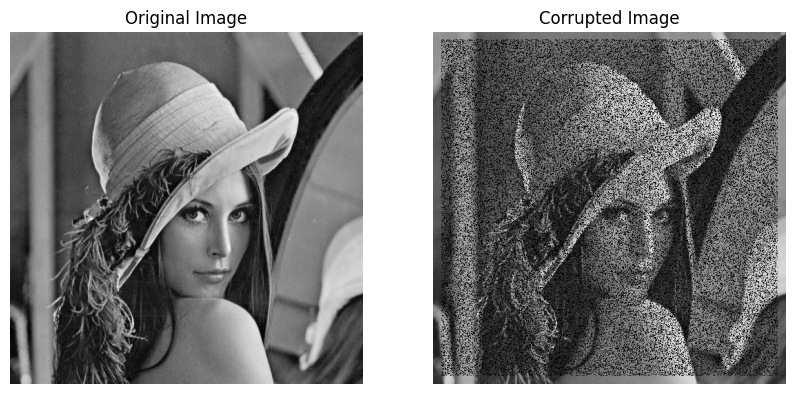

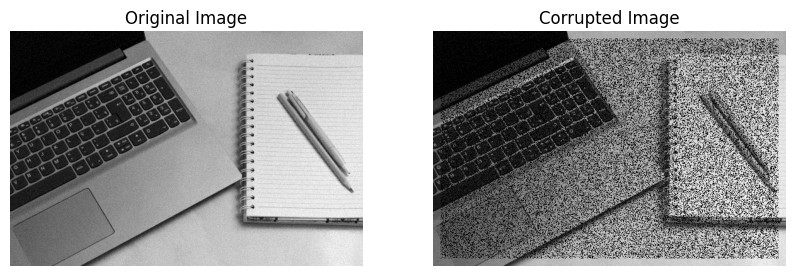

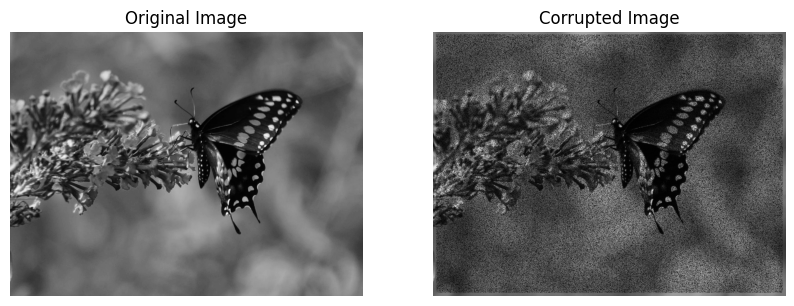

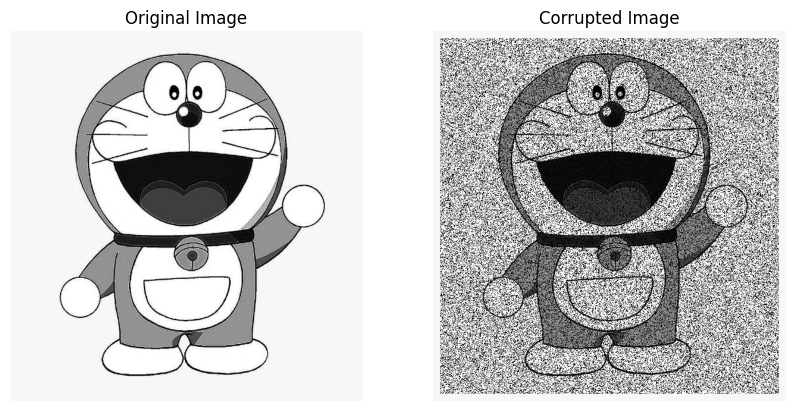

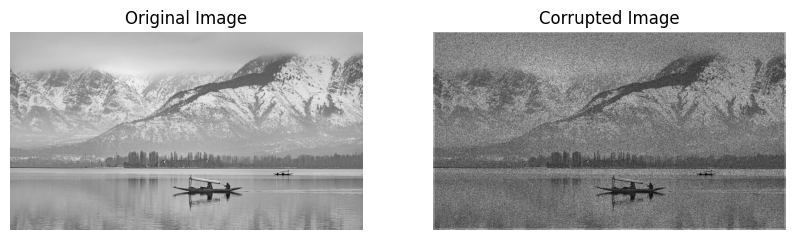

In [7]:
# Visulization Cell

plot_corrupted_images(lena, corrupted_lena)
plot_corrupted_images(study, corrupted_study)
plot_corrupted_images(butterfly, corrupted_butterfly)
plot_corrupted_images(doremon, corrupted_doremon)
plot_corrupted_images(kashmir, corrupted_kashmir)

In [8]:
restored_lena = restore_image(img = corrupted_lena, corruption_mask = corruption_mask_lena, window_size = 25, alpha = 2, p = 4)
restored_study = restore_image(img = corrupted_study, corruption_mask = corruption_mask_study, window_size = 25, alpha = 2, p = 4)
restored_butterfly = restore_image(img = corrupted_butterfly, corruption_mask = corruption_mask_butterfly, window_size = 25, alpha = 2, p = 4)
restored_doremon = restore_image(img = corrupted_doremon, corruption_mask = corruption_mask_doremon, window_size = 25, alpha = 2, p = 4)
restored_kashmir = restore_image(img = corrupted_kashmir, corruption_mask = corruption_mask_kashmir, window_size = 25, alpha = 2, p = 4)

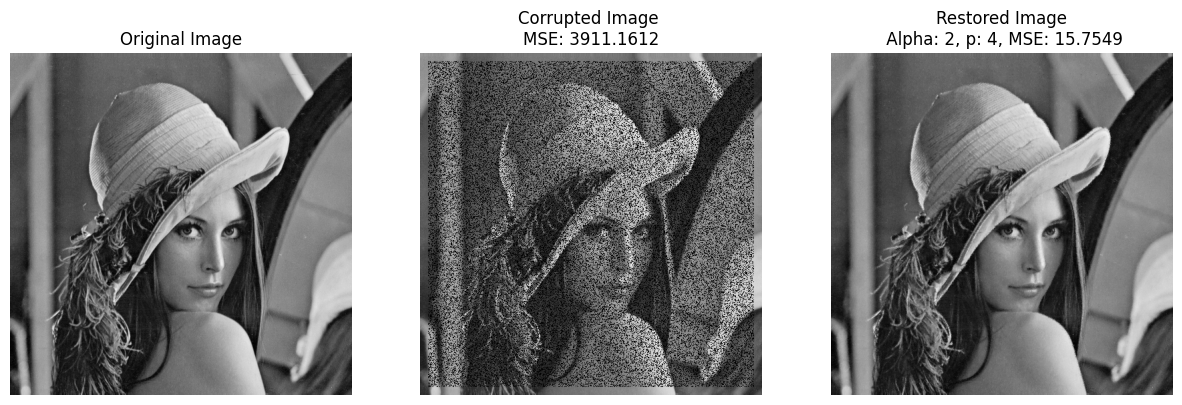

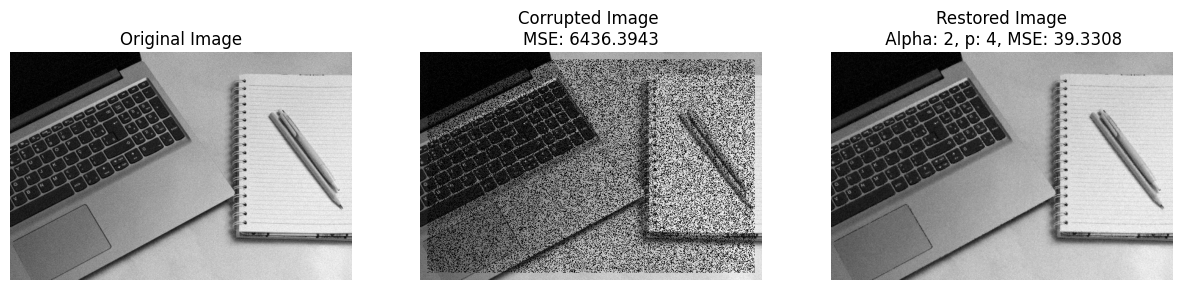

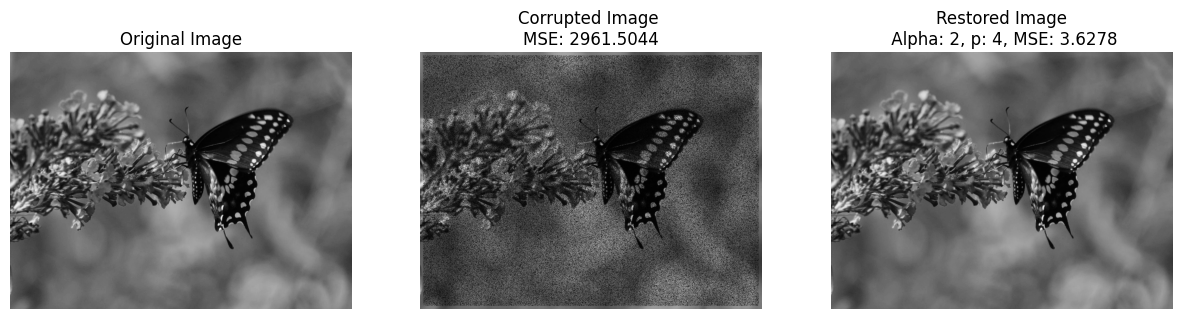

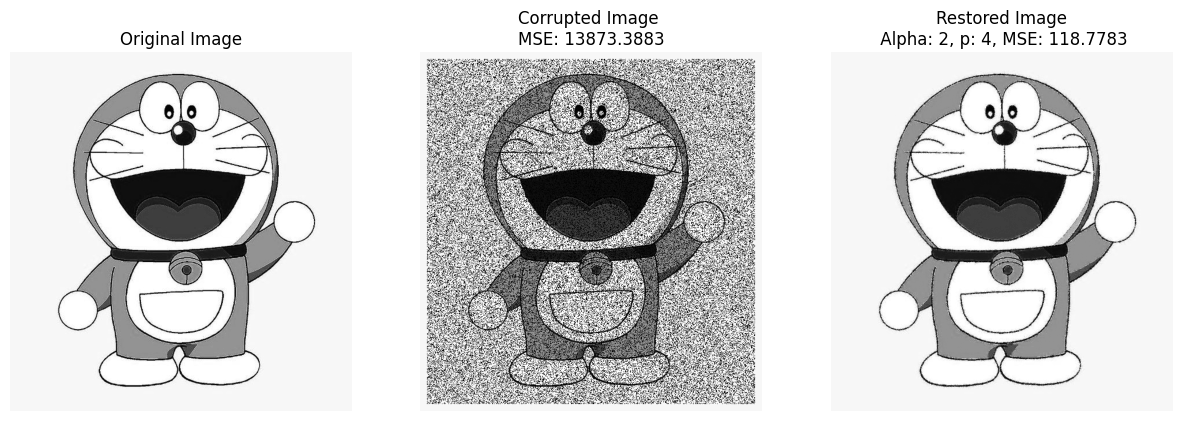

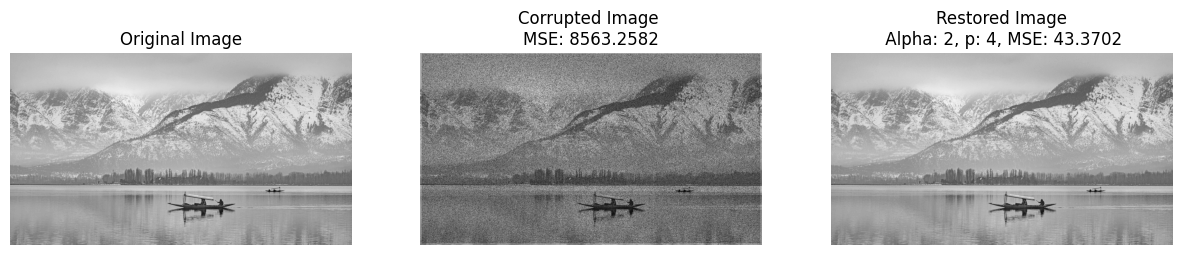

In [9]:
plot_restored_images(lena, corrupted_lena, restored_lena, alpha = 2, p = 4)
plot_restored_images(study, corrupted_study, restored_study, alpha = 2, p = 4)
plot_restored_images(butterfly, corrupted_butterfly, restored_butterfly, alpha = 2, p = 4)
plot_restored_images(doremon, corrupted_doremon, restored_doremon, alpha = 2, p = 4)
plot_restored_images(kashmir, corrupted_kashmir, restored_kashmir, alpha = 2, p = 4)

### **Iterative Image Interpolation**

In [11]:
def restore_image_iterative(img, recons_image, corruption_mask, window_size = 21, alpha = 1, p = 2):

    reconstructed_image = img.copy()

    # Calculate gradients using Sobel operators
    gradient_x = cv2.Sobel(recons_image.copy(), cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(recons_image.copy(), cv2.CV_64F, 0, 1, ksize=3)

    gradient_angle = np.arctan2(gradient_y,gradient_x)
    gradient = np.dstack((gradient_y,gradient_x))

    # weights
    x = np.arange(-(window_size//2),window_size//2 + 1)
    y = np.arange(-(window_size//2),window_size//2 + 1)

    yv, xv = np.meshgrid(x, y)

    w = 1 / (1 + alpha * (xv**2 + yv**2)**(p/2))

    distances = np.dstack((yv,xv))
    distance_angle = np.arctan2(yv,xv)

    sigma = 0.1

    dead_pixels = np.dstack((np.where(corruption_mask==0)[0],np.where(corruption_mask==0)[1]))[0]

    for pixel_location in dead_pixels:

        patch = img[pixel_location[0] - window_size//2 :pixel_location[0] + window_size//2 + 1, pixel_location[1] - window_size//2 :pixel_location[1] + window_size//2 + 1]

        reconstruction_mask = corruption_mask[pixel_location[0] - window_size//2 :pixel_location[0] + window_size//2 + 1, pixel_location[1] - window_size//2 :pixel_location[1] + window_size//2 + 1]

        gradient_patch = gradient[pixel_location[0] - window_size//2 :pixel_location[0] + window_size//2 + 1, pixel_location[1] - window_size//2 :pixel_location[1] + window_size//2 + 1]

        # dot product b/w distance and gradient
        v = np.abs(np.sum(distances*gradient_patch,axis=-1))

        # Function Phi
        v = 1 - np.exp(- v / (2* sigma**2))

        valid_v = v * reconstruction_mask

        valid_w = w * reconstruction_mask

        normalization = np.sum(valid_w * valid_v)

        reconstructed_image[pixel_location[0]][pixel_location[1]] = np.sum(valid_w * valid_v  * patch) / normalization

    return reconstructed_image

In [22]:
def iterative_image_restore(restored_img, corruption_mask, corrupted_img, n_iterations = 20):

    output_images = []
    output_images.append(restored_img)

    for iter in range(n_iterations):

        output_img = restore_image_iterative(img = corrupted_img, recons_image = restored_img, corruption_mask = corruption_mask, window_size = 25, alpha = 2, p = 4)

        if (iter+1)%5==0:
            output_images.append(output_img.copy())

        restored_img = output_img

    return output_images

In [47]:
def plot_output_images(output_images, original_img):

    plt.figure(figsize = (20,7))

    for i,image in enumerate(output_images[1:]):

        plt.subplot(1,len(output_images)-1,i+1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(f'Iteration : {(i+1)*5} \nMSE : {mse(image, original_img):.4f}', fontsize = 10)

In [24]:
out_images_lena = iterative_image_restore(restored_img = restored_lena, corruption_mask = corruption_mask_lena, corrupted_img = corrupted_lena, n_iterations = 20)

In [33]:
out_images_study = iterative_image_restore(restored_img = restored_study, corruption_mask = corruption_mask_study, corrupted_img = corrupted_study, n_iterations = 20)

In [34]:
out_images_butterfly = iterative_image_restore(restored_img = restored_butterfly, corruption_mask = corruption_mask_butterfly, corrupted_img = corrupted_butterfly, n_iterations = 20)

In [35]:
out_images_doremon = iterative_image_restore(restored_img = restored_doremon, corruption_mask = corruption_mask_doremon, corrupted_img = corrupted_doremon, n_iterations = 20)

In [36]:
out_images_kashmir = iterative_image_restore(restored_img = restored_kashmir, corruption_mask = corruption_mask_kashmir, corrupted_img = corrupted_kashmir, n_iterations = 20)

**Results**

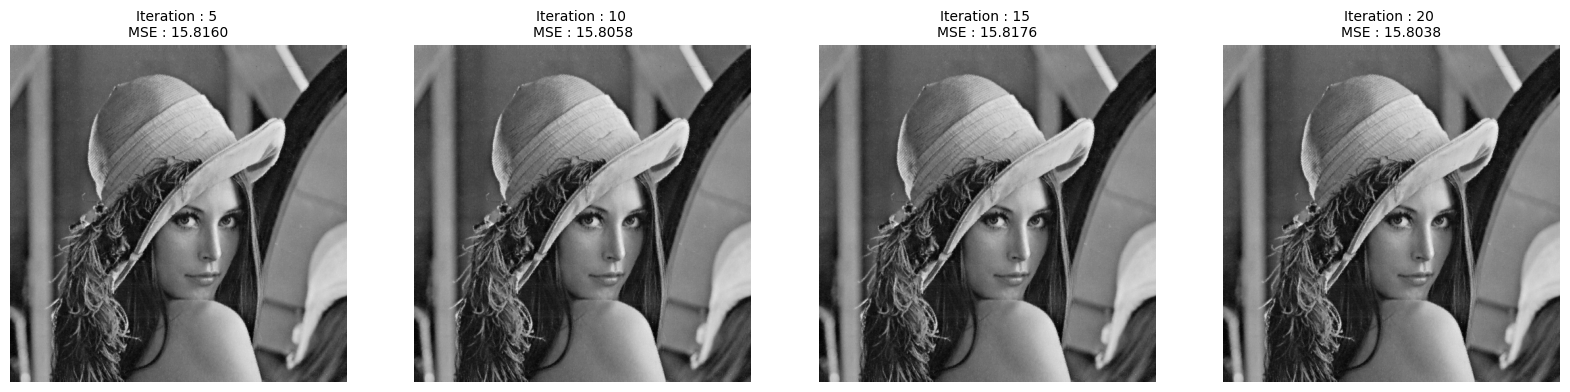

In [48]:
plot_output_images(out_images_lena, lena)

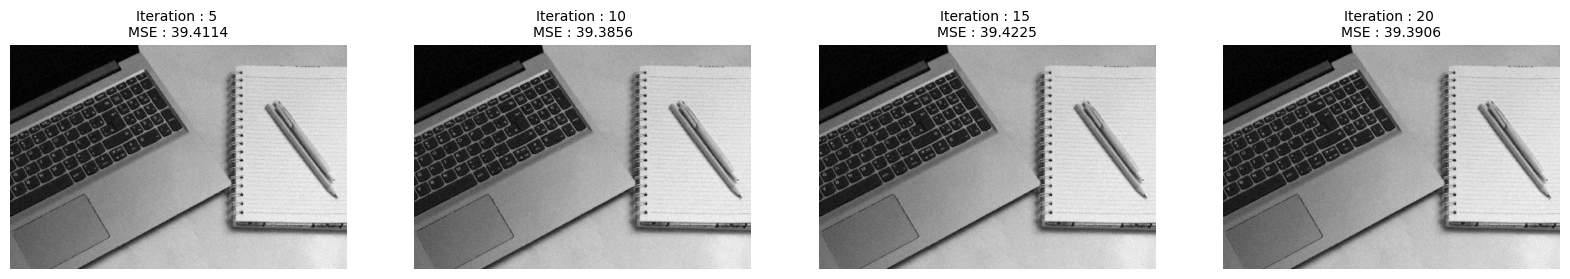

In [49]:
plot_output_images(out_images_study, study)

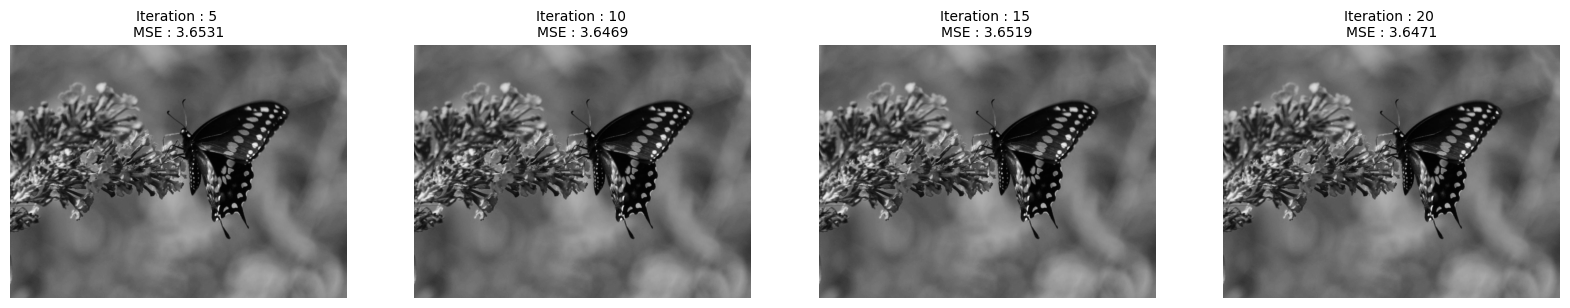

In [50]:
plot_output_images(out_images_butterfly, butterfly)

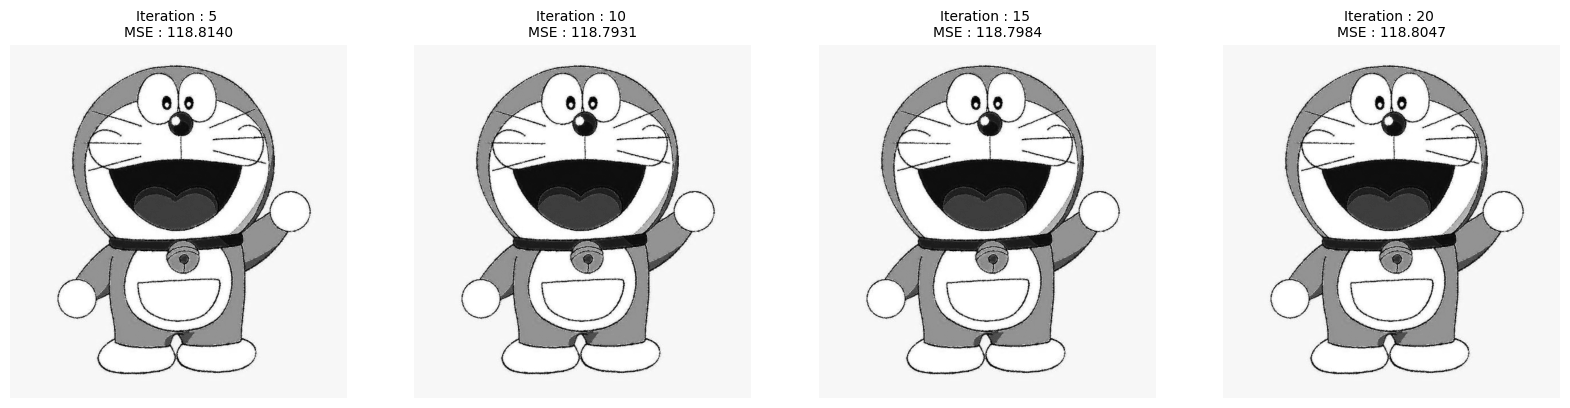

In [51]:
plot_output_images(out_images_doremon, doremon)

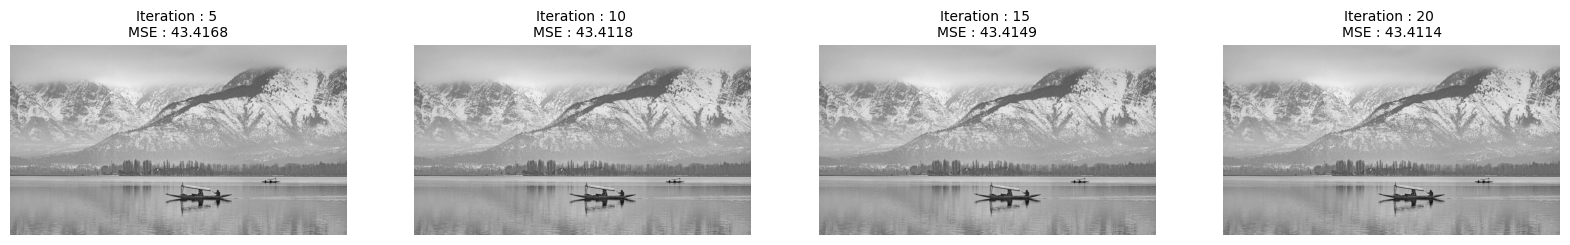

In [52]:
plot_output_images(out_images_kashmir, kashmir)